<a href="https://colab.research.google.com/github/Knightler/machine-learning/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Classification

This project is about predicting the species of the flowers based on the given dataset.

Let's first experiment with the dataset, unzip the file which we downloaded from the kaggle website

Iris Species Dataset - https://www.kaggle.com/datasets/uciml/iris

## Data Preprocessing

In [90]:
# Unzip the file
#!unzip '/content/drive/MyDrive/Data/archive (2).zip' -d '/content/drive/MyDrive/Data/'

In [91]:
# Import the important libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [92]:
# Read the csv and asign it to the variable
iris = pd.read_csv('/content/drive/MyDrive/Data/Iris.csv')

In [93]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [96]:
# Inspecting to see if our dataset has any NaN or Null
iris.isna().sum(), iris.isnull().sum()

(Id               0
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64,
 Id               0
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64)

This means that our dataset doesn't have any NaN or Null which is a good sign, so we don't need to consider replacing or dropping any value

In [39]:
iris.shape

(150, 6)

In [98]:
# Turn every sting into numerical representation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

In [41]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [43]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [99]:
# Split our data into X and y
X = iris.drop('Species', axis=1)
y = iris['Species']

In [101]:
# Split the data into train 80% and test sets 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Let's Standardize our dataset by making them zero mean (0) and unit variance (1), which helps models perform better by ensuring equal feature importance by preventing  large-valued features from dominating smaller ones.

In [102]:
# Standardize our data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we need to create a function which tries each specific algorithms, fit and take the score of each model.

In [83]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of different Scikit-Learn machine learning models
  X_train : training data (no labels)
  X_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  """

  # Set random seed
  np.random.seed(42)
  # Make a dictionary to keep model score
  model_score = {}
  # Loop through models
  for name, models in models.items():
    # Fit the model to the data
    models.fit(X_train, y_train)
    # Evaluate the model and append its score to model_score
    model_score[name] = models.score(X_test, y_test)
  return model_score

In [103]:
# Taking the score of each model
model_score = fit_and_score(models=models,
                            X_train=X_train_scaled,
                            X_test=X_test_scaled,
                            y_train=y_train,
                            y_test=y_test)
model_score

{'Logistic Regression': 1.0,
 'RandomForestClassifier': 1.0,
 'DecisionTreeClassifier': 1.0,
 'KNeighborsClassifier': 1.0,
 'SVC': 1.0}

As we saw, all of our models predicted with the accuracy of 100%, which is suspicious.
Maybe our model is overfitting, or has any duplicated values or data leak from train set into the test set.

Let's experiment

In [104]:
# Check the duplicated values
duplicate_count = iris.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


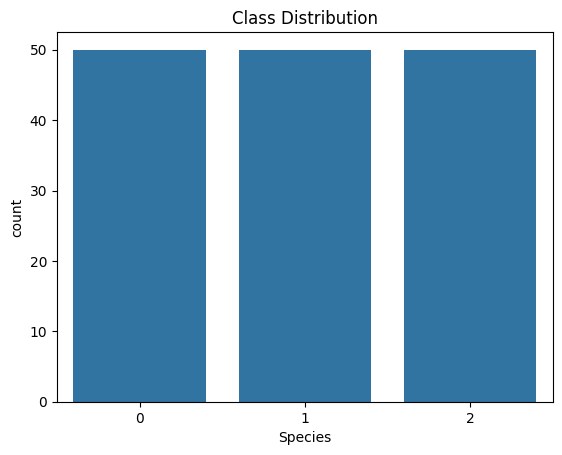

In [105]:
# Let's plot our models accuracies
sns.countplot(x='Species', data=iris)
plt.title('Class Distribution')
plt.show()

In [87]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 5) (30, 5) (120,) (30,)


In [88]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 40, 1: 40, 2: 40}


In [89]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} Cross-Validation Score: {np.mean(scores):.4f}")


Logistic Regression Cross-Validation Score: 0.9917
RandomForestClassifier Cross-Validation Score: 1.0000
DecisionTreeClassifier Cross-Validation Score: 0.9917
KNeighborsClassifier Cross-Validation Score: 1.0000
SVC Cross-Validation Score: 1.0000


After all these experimentation, what we've foundout, is that the reason why the scores were all extremely high, is because the Iris dataset is very easy to learn.